# "Invistico" Airlines
## Decision Tree Approach to Predicting Customer Satisfaction

---
#### Overview:
Purpose: Determine the most significant features important to customer satisfaction. 

Objective: Build a decision tree model that determines customer satisfaction based on historical flight experience feedback for an anonymized airline.

**Part 1:** EDA & Data Preparation
- Summary Statistics
- Univariate Analysis
- Data Cleaning
- Feature Transformations

**Part 2:** Model Building and Evaluation
- Model Training, Testing
- Results Visualizations
- Hyperparameter Tuning
- Model Evaluations

**Part 3:** Conclusion/Summary

---

### **Change Log**

Date | Author | Version | Change Desc
--- | --- | --- | ---
2024_0501 | S. Souto | v1 | Initial Version
2024_0813 | S. Souto | v1.1 | Updated format to match portfolio projects

---

### **Data Sources**

1. Original data: Kaggle.com: "Invistico_Airline.csv"

### **Notebook Setup**

In [8]:
# Import packages and libraries
import numpy as np
import pandas as pd

# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Packages for date conversions

# Packages for modeling, evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [9]:
# Notebook setup
pd.set_option('display.max_columns', None)

## Part 1: EDA & Data Preparation

### Data Loading

In [12]:
# Load dataset into dataframe, save copy
df0 = pd.read_csv('data/Invistico_Airline.csv')
df1 = df0.copy()

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Initial Exploration

In [15]:
df1.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


#### Check for missing, duplicate data

In [17]:
# Check for duplicates
print('Shape of dataframe:', df1.shape)
print('Shape of dataframe with duplicates dropped:', df1.drop_duplicates().shape)

Shape of dataframe: (129880, 22)
Shape of dataframe with duplicates dropped: (129880, 22)


In [18]:
# Check for missing values
print('Total count of missing values:', df1.isna().sum().sum())

Total count of missing values: 393


In [19]:
# Display missing values per column in dataframe
print('Missing values per column:')
df1.isna().sum()

Missing values per column:


satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

#### Summary Statistics

In [21]:
# Display descriptive stats
df1.describe(include='all')

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


Preliminary analysis:
- There are 129880 observations and 22 features, no duplicates.
- There are 393 missing values, all in `Arrival Delay in Minutes`.
- All columns are numeric except `satisfaction`, `Customer Type`, `Type of Travel`, `Class`. 
- Target variable `satisfaction` will need to be converted to numeric.
- Data encoding will be required for string dtypes, required for decision trees.


### Univariate Analysis

#### Display unique values

In [26]:
# Display the class balance of the target
df1['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

There are 71,087 satisfied customers (54.7%) and 58,793 (45.3%) dissatisfied customers in the dataset.

In [28]:
# Display remaining object dtypes
print("Customer Type:", df1["Customer Type"].unique())
print("Type of Travel:", df1["Type of Travel"].unique())
print("Class:", df1["Class"].unique())

Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco' 'Business' 'Eco Plus']


Columns `Customer Type` and `Type of Travel` contain categorical data, while column `Class` contains ordinal data.

### Data Cleaning

In [31]:
# Remove missing 'Arrival Delay in Minutes` rows
df2 = df1.dropna(axis=0).reset_index(drop = True)
df2.shape

(129487, 22)

### Feature Transformations

#### Encode object dtypes (specific mappings)

In [34]:
# Map target with specific values
df2['satisfaction'] = df2['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

# `Class` is ordinal and requires a specific order mapping
df2['Class'] = df2['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 

#### Convert remaining categorical columns into numeric

In [36]:
df2 = pd.get_dummies(df2, drop_first = True)

In [37]:
df2.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
dtype: obj

## Part 2: Model Building and Evaluation

#### Prepare data and fit the model

In [40]:
# Isolate target variable (y)
y = df2["satisfaction"]

# Isolate the features (X)
X = df2.copy()
X = X.drop("satisfaction", axis = 1)

##### Create training and holdout sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##### Fit a Decision Tree Classifier to the training data

In [44]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

In [45]:
# Get scoring metrics
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.935438
Precision: 0.942859
Recall: 0.939030
F1 Score: 0.940940


#### Visualize results

Plot a confusion matrix of the model's predictions on the test data:

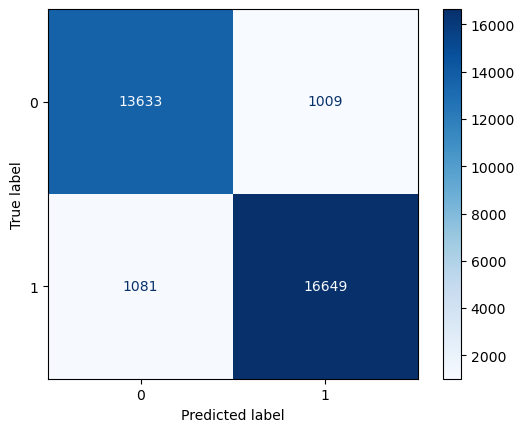

In [48]:
# Generate array of values for confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot(cmap = "Blues", values_format='');

The model's 94.1% F1 score shows it's adept at accurately classifying customer satisfaction. It exhibits minimal errors in predicting either satisfaction or dissatisfaction, indicating a robust performance.

Plot the decision tree:

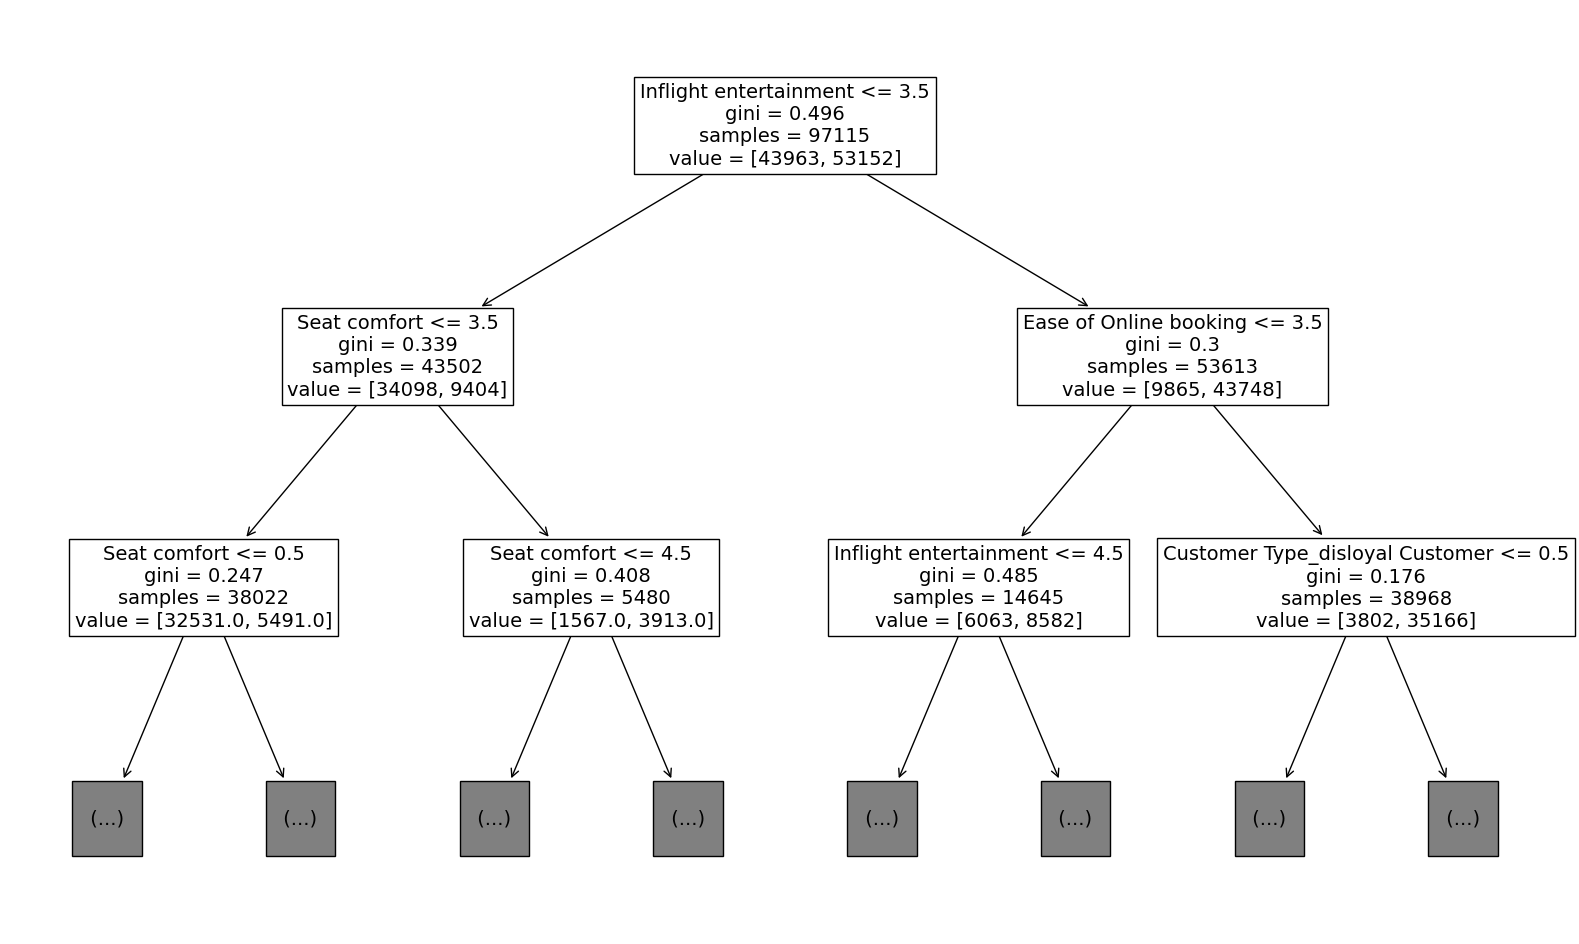

In [51]:
#plot the decision tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

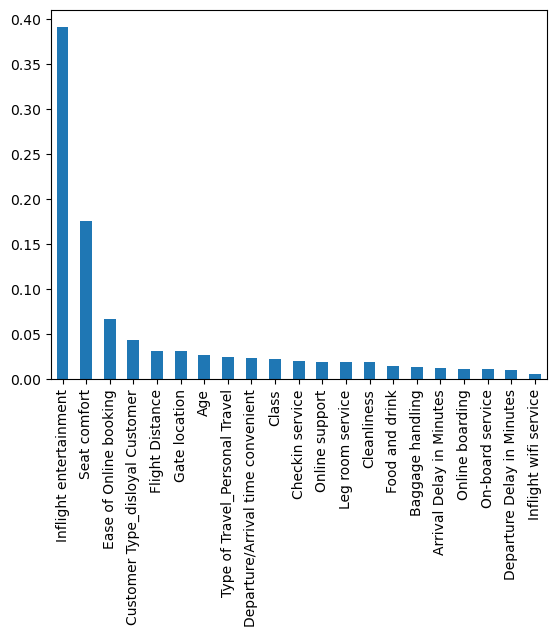

In [52]:
# Retrieve feature importances
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

Both the decision tree plot and the feature importance graph indicate that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features for this model. 

#### Hyperparameter tuning

In [56]:
# Set the hyperparameter ranges for specific hyperparameters
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9,10,15,20,50]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

Check combinations of values to examine which pair has the best evaluation metrics using GridSearch

In [57]:
# GridSearch
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [58]:
# Compute the best combination of values for the hyperparameters
clf.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=0)

In [59]:
# Determine the best average validation score
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9454


In [60]:
# Create make_results function and dataframe to store the results from GridSearchCV

results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864


After experimenting with different hyperparameter settings, a maximum depth of 18 and a minimum of 2 samples per leaf proved to be the best combination, resulting in an F1 score of 0.9454. However, given the marginal improvement compared to the untuned model (F1 = 0.9409), the added computational cost of hyperparameter tuning might not be worthwhile.

#### Compare the visual results - untuned vs. tuned:

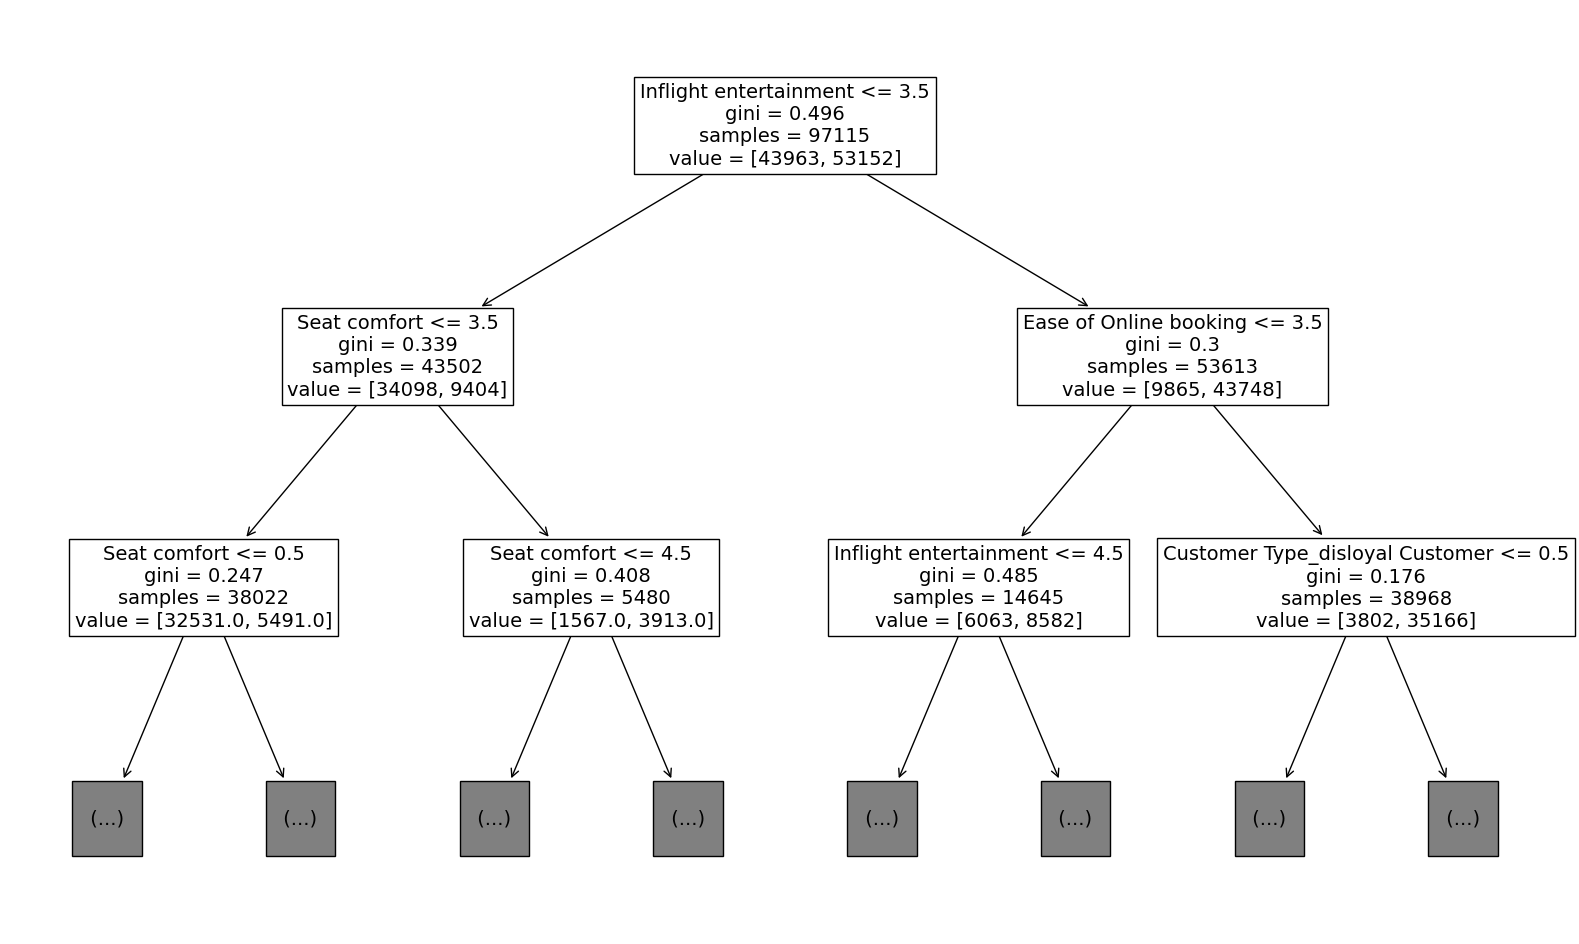

In [96]:
#plot the tuned decision tree
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

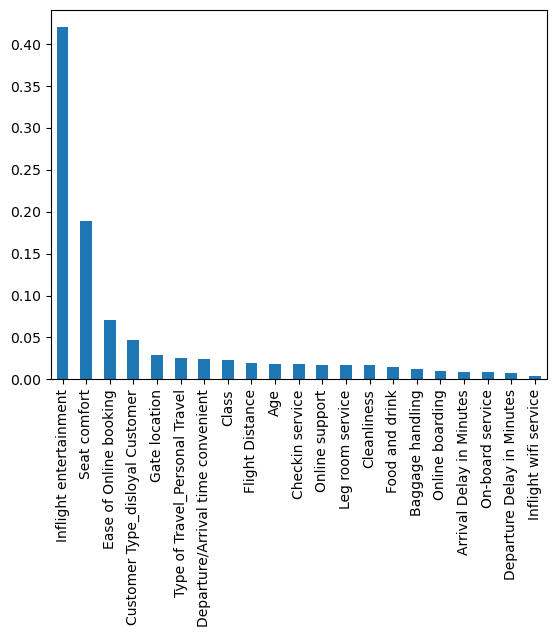

In [98]:
# Retrieve the tuned model's feature importances
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

Both untuned and tuned models agree that`'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the "most important" features.

## Part 3: Conclusion/Summary

The decision tree model demonstrated exceptional accuracy in predicting customer satisfaction, correctly classifying over 94% of cases. The confusion matrix further supports this performance, revealing a balanced distribution of true positives and true negatives.

A visual analysis of the decision tree and its feature importance graph highlighted the pivotal role of `Inflight entertainment`, `Seat comfort`, and `Ease of Online booking` in determining overall satisfaction. These factors emerged as the most significant predictors within the model.

Hyperparameter tuning did not lead to increased performance or provide additional insights in this case.

**Stakeholder recommendations:**

Our analysis underscores the critical influence of `Inflight entertainment`, `Seat comfort`, and `Ease of Online booking` on customer satisfaction. Prioritizing improvements in these areas is likely to yield significant gains in overall customer sentiment.

The model's effectiveness demonstrates the value of investing in data-driven decision-making. The ability to accurately predict customer satisfaction highlights the potential benefits of further developing and understanding machine learning models within the airline industry.
